In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
%matplotlib inline

In [ ]:
df = pd.read_csv('Amazon _data.csv')
df.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [ ]:
df.isnull().sum() # finding null value

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        3
sentiment            0
dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

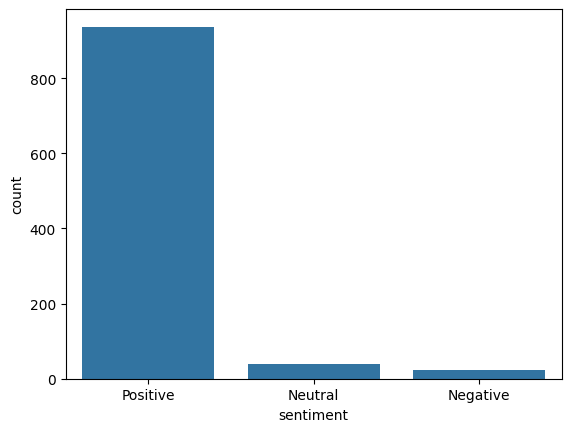

In [ ]:
sns.countplot(data=df, x='sentiment', order=df.sentiment.value_counts().index)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
df['reviews.text'] = df['reviews.text'].apply(lambda x: x.lower())


In [ ]:
df['reviews.text'] = df['reviews.text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [ ]:
def preprocess_text(text):

    tokens = word_tokenize(text.lower()) #text ko token ki form
                                         #remove punctuation and stop words
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    preprocessed_text = ' '.join(filtered_tokens) #  filtered tokens into a string ko again rejoin
    return preprocessed_text
df['reviews.text'] = df['reviews.text'].apply(preprocess_text)#product review column preprocessed

In [ ]:
df['reviews.text']

0      amazon kindle fire lot free app used one wants...
1      echo show great addition amazon family works l...
2             great value best buy bought christmas sale
3      use mine email facebook games go line also loa...
4                     fantastic item person bought loves
                             ...                        
995    love alexa love able watch news briefings seei...
996    speaker pretty loud love take downside hold ho...
997    bought 2 6 8 yr old said came 32gb storage act...
998    told sales person could come back week receipt...
999    purchased gift mother first tablet loves easy ...
Name: reviews.text, Length: 1000, dtype: object

In [ ]:
#Converting text into Vectors(number of times in the text a word appears)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
#count vectorization
preprocess_review = cv.fit_transform(df['reviews.text']) #x independent
y = df['sentiment']

In [ ]:
#Model training, Evaluation, and Prediction
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(preprocess_review, y, test_size=0.2, random_state=42)

In [ ]:
#first model naive bayes
#This classifier makes use of a multinomial distribution and is often used to solve issues involving document or text classification.
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
#testing the model
from sklearn.metrics import classification_report,accuracy_score
prediction = nb.predict(X_test) # predictions on the test set
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         7
     Neutral       0.00      0.00      0.00         7
    Positive       0.93      0.97      0.95       186

    accuracy                           0.91       200
   macro avg       0.31      0.32      0.32       200
weighted avg       0.87      0.91      0.89       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
prediction = nb.predict(X_test)
print(accuracy_score(y_test,prediction)) #naive bayes accuray

0.905


In [ ]:
#decision tree 2 model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
prediction = dt.predict(X_test) # predictions on the test set
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         7
     Neutral       0.17      0.29      0.21         7
    Positive       0.94      0.94      0.94       186

    accuracy                           0.89       200
   macro avg       0.37      0.41      0.38       200
weighted avg       0.88      0.89      0.88       200



In [ ]:
prediction = dt.predict(X_test)
print(accuracy_score(y_test,prediction))#accuracy dt

0.885


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
prediction = rf.predict(X_test) # predictions on the test set
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         7
     Neutral       0.00      0.00      0.00         7
    Positive       0.93      1.00      0.96       186

    accuracy                           0.93       200
   macro avg       0.31      0.33      0.32       200
weighted avg       0.86      0.93      0.90       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
prediction = rf.predict(X_test)
print(accuracy_score(y_test,prediction))

0.93
